In [2]:
import torch
import random
import numpy as np

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib
plt.style.use('fivethirtyeight')
matplotlib.rcParams['figure.figsize'] = (15.0,5.0)

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True


import torchvision.datasets




In [3]:
import torchvision.datasets
MNIST_train = torchvision.datasets.MNIST('./', download=True, train=True)
MNIST_test = torchvision.datasets.MNIST('./', download=True, train=False)


In [20]:
X_train = MNIST_train.data
y_train = MNIST_train.targets
X_test = MNIST_test.data
y_test = MNIST_test.targets


In [5]:
X_train = X_train.float()
X_test = X_test.float()


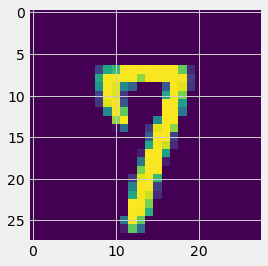

tensor(7)


In [7]:
plt.style.use('fivethirtyeight')
plt.imshow(X_train[888, :, :])
plt.show()
print(y_train[888])


In [8]:
X_train = X_train.reshape([-1, 28*28])
X_test = X_test.reshape([-1, 28*28])


In [9]:
class MNISTNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(MNISTNet, self).__init__()
        self.fc1 = torch.nn.Linear(28*28, n_hidden_neurons)
        self.act1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons,n_hidden_neurons)
        self.act2 = torch.nn.Sigmoid()
        self.fc3 = torch.nn.Linear(n_hidden_neurons,10)
        self.sm = torch.nn.Softmax(dim = 1)
        
        

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        x = self.act2(x)
        x = self.fc3(x)
        return x
    
    def inference(self,x):
        x = self.forward(x)
        x = self.sm(x)
        return x
    
mnist_net = MNISTNet(100)


In [10]:
torch.cuda.is_available()

False

In [11]:
#!nvidia-smi

In [12]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
mnist_net = mnist_net.to(device)
#list(mnist_net.parameters())

In [13]:
loss = torch.nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(mnist_net.parameters(), lr = 1.0e-3)


In [14]:
batch_size = 100

test_accuracy_history = []
test_loss_history = []

X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(100):
    order = np.random.permutation(len(X_train))
    for start_index in range(0,len(X_train), batch_size):
        optimizer.zero_grad()
        
        batch_indexes = order[start_index:start_index+batch_size]
        
        X_batch = X_train[batch_indexes].to(device)
        y_batch = y_train[batch_indexes].to(device)
        
        preds = mnist_net.forward(X_batch)
        
        loss_val = loss(preds, y_batch)
        loss_val.backward()
        
        optimizer.step()
        
    test_preds = mnist_net.forward(X_test)
    test_loss_history.append(loss(test_preds,y_test))
    
    accuracy = (test_preds.argmax(dim=1) == y_test).float().mean()
    test_accuracy_history.append(accuracy)
    print('current accuracy is ', accuracy)
    if accuracy>=0.975:
        break
        

current accuracy is  tensor(0.8959)
current accuracy is  tensor(0.9056)
current accuracy is  tensor(0.9102)
current accuracy is  tensor(0.9176)
current accuracy is  tensor(0.9224)
current accuracy is  tensor(0.9241)
current accuracy is  tensor(0.9208)
current accuracy is  tensor(0.9292)
current accuracy is  tensor(0.9289)
current accuracy is  tensor(0.9275)
current accuracy is  tensor(0.9342)
current accuracy is  tensor(0.9321)
current accuracy is  tensor(0.9346)
current accuracy is  tensor(0.9375)
current accuracy is  tensor(0.9354)
current accuracy is  tensor(0.9375)
current accuracy is  tensor(0.9378)
current accuracy is  tensor(0.9421)
current accuracy is  tensor(0.9379)
current accuracy is  tensor(0.9343)
current accuracy is  tensor(0.9447)
current accuracy is  tensor(0.9433)
current accuracy is  tensor(0.9408)
current accuracy is  tensor(0.9458)
current accuracy is  tensor(0.9440)
current accuracy is  tensor(0.9451)
current accuracy is  tensor(0.9490)
current accuracy is  tensor(

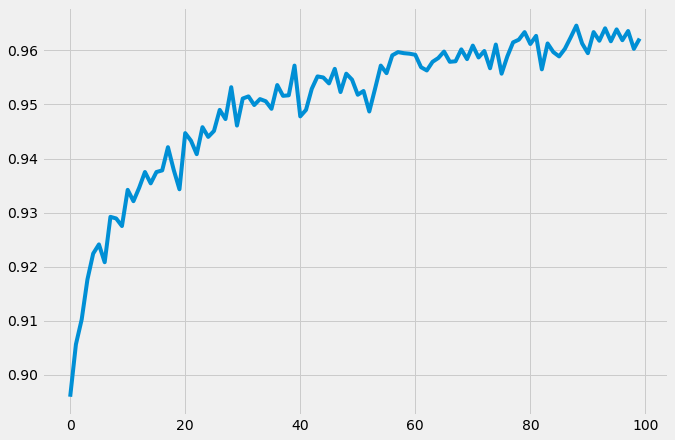

In [15]:
plt.figure(figsize=(10,7))
plt.plot(test_accuracy_history);

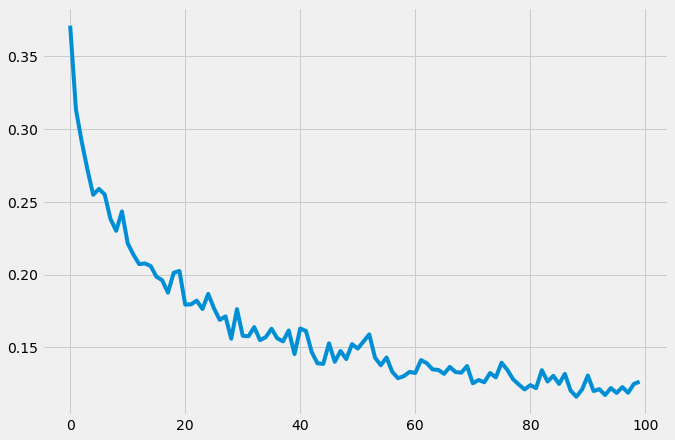

In [16]:
plt.figure(figsize=(10,7))
plt.plot(test_loss_history);
